In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [3]:
data = pd.read_excel('/content/dataset assignment 2 (2).xlsx')
df = pd.DataFrame(data)
items = df.iloc[:, 1:]

In [4]:
tnu = len(df['users'])
tni = len(items.columns)

In [5]:
print(tnu)
print(tni)

43
12


In [6]:
non_null= df.count()
print(non_null)

users                    43
jane eyre                35
1984                     34
wuthering                43
picture of dorian        11
catcher in rye           36
sense and sensibility    37
great expectations       37
tale of cities           38
brave new world          42
macbeth                  33
The Great Gatsby         35
picture of dorian        27
dtype: int64


In [7]:
U1 = df[df.isnull().sum(axis=1) == 2]
U1 = U1.iloc[1,:]
U2 = df[df.isnull().sum(axis=1) == 3]
U3 = df[df.isnull().sum(axis=1) ==5 ]

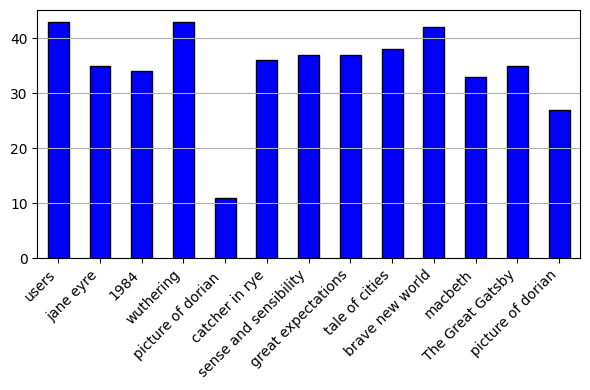

In [11]:
item_ratings_count = df.count(axis=0)
plt.figure(figsize=(6,4))
item_ratings_count.plot(kind='bar', color='blue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [26]:
num_users = len(df)
results = []

for i in range(num_users):
    for j in range(i + 1, num_users):
        co_rated_items = df.iloc[i].notna() & df.iloc[j].notna()
        no_coRated_items = co_rated_items.sum()

        if no_coRated_items > 0:
            results.append((2, no_coRated_items))


co_rated_data = np.array(results, dtype=[('No_common_users', int), ('No_coRated_items', int)])


array = np.sort(co_rated_data, order='No_common_users')[::-1]


print(array)

[(2, 12) (2, 12) (2, 12) (2, 12) (2, 12) (2, 12) (2, 12) (2, 12) (2, 12)
 (2, 12) (2, 12) (2, 12) (2, 12) (2, 12) (2, 12) (2, 12) (2, 12) (2, 12)
 (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11)
 (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11)
 (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11)
 (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11)
 (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11)
 (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11)
 (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11)
 (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11)
 (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11)
 (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 11)
 (2, 11) (2, 11) (2, 11) (2, 11) (2, 11) (2, 10) (2, 10) (2, 10) (2, 10)
 (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2, 10) (2

# User-based cosine



In [30]:

from sklearn.metrics.pairwise import cosine_similarity

filled_items = items.fillna(0)
cosine_sim = cosine_similarity(filled_items)
cosine_sim_df = pd.DataFrame(cosine_sim, index=items.index, columns=items.index)

def compute_ds(sim_matrix, threshold):

    return np.where(sim_matrix > threshold, sim_matrix / (1 + threshold), 0)


discount_factor = 8
discounted_cosine_sim_df = pd.DataFrame(compute_ds(cosine_sim_df, discount_factor), index=cosine_sim_df.index, columns=cosine_sim_df.columns)


def get_top_k(similarity_matrix, k_percent):
    k = int(similarity_matrix.shape[0] * k_percent)
    top_users = {}
    for user in similarity_matrix.index:
        similar_users = similarity_matrix.loc[user].sort_values(ascending=False).iloc[1:k+1]
        top_users[user] = similar_users.index.tolist()
    return top_users

top_20_percent_users = get_top_k(cosine_sim_df, 0.2)

top_20_percent_users_ds = get_top_k(discounted_cosine_sim_df, 0.2)

def predict_rating(active_user, top_users, df):
    active_user_ratings = df.loc[active_user]
    predictions = {}
    for item in df.columns:
        if pd.isna(active_user_ratings[item]):
            similar_users = top_users[active_user]
            ratings = df.loc[similar_users, item].dropna()
            if len(ratings) > 0:
                predictions[item] = ratings.mean()
    return predictions

U1_index = U1.name
U2_index = U2.index[0]
U3_index = U3.index[0]

users_to_predict = [U1_index, U2_index,U3_index]

for user in users_to_predict:
    print(f"Top  {user} (Original Cosine Similarity): {top_20_percent_users[user]}")
    predictions = predict_rating(user, top_20_percent_users, df)
    print(f"Predictions {user} (Original Cosine Similarity): {predictions}")

    print(f"Top 20% {user} (Discounted s): {top_20_percent_users_ds[user]}")
    predictions_ds = predict_rating(user, top_20_percent_users_ds, df)
    print(f"Predictions  {user} (Discounted s): {predictions_ds}")

    print("-" * 50)


Top 20% closest users for 4 (Original Cosine Similarity): [25, 8, 11, 24, 26, 16, 36, 23]
Predictions for 4 (Original Cosine Similarity): {'1984': 2.8, 'picture of dorian': 1.75}
Top 20% closest users for 4 (Discounted Cosine Similarity): [32, 24, 25, 26, 27, 28, 29, 30]
Predictions for 4 (Discounted Cosine Similarity): {'1984': 3.2857142857142856, 'picture of dorian': 2.4285714285714284}
--------------------------------------------------
Top 20% closest users for 1 (Original Cosine Similarity): [12, 27, 15, 9, 29, 3, 23, 5]
Predictions for 1 (Original Cosine Similarity): {'macbeth': 2.75, 'The Great Gatsby': 1.2, 'picture of dorian': 2.0}
Top 20% closest users for 1 (Discounted Cosine Similarity): [32, 24, 25, 26, 27, 28, 29, 30]
Predictions for 1 (Discounted Cosine Similarity): {'macbeth': 2.857142857142857, 'The Great Gatsby': 1.6, 'picture of dorian': 2.4285714285714284}
--------------------------------------------------
Top 20% closest users for 41 (Original Cosine Similarity): [3

# User meancentered cosine

In [31]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


mean_centered = items.sub(items.mean(axis=1), axis=0)
filled_centered_df = mean_centered.fillna(0)

cosine_sim_centered = cosine_similarity(filled_centered_df)
cosine_sim_centered_df = pd.DataFrame(cosine_sim_centered, index=items.index, columns=items.index)


def get_top_k_users(similarity_matrix, k_percent):
    k = int(similarity_matrix.shape[0] * k_percent)
    top_users = {}
    for user in similarity_matrix.index:
        similar_users = similarity_matrix.loc[user].sort_values(ascending=False).iloc[1:k+1]  # Exclude self
        top_users[user] = similar_users.index.tolist()
    return top_users

top_20 = get_top_k_users(cosine_sim_centered_df, 0.2)


def predict_ratings(active_user, top_users, df):
    active_user_ratings = df.loc[active_user]
    predictions = {}
    for item in df.columns:
        if pd.isna(active_user_ratings[item]):
            similar_users = top_users[active_user]
            ratings = df.loc[similar_users, item].dropna()
            if len(ratings) > 0:
                predictions[item] = ratings.mean()
    return predictions


users_to_predict = items.index[:3]

print("Predictions using mean-centered cosine similarity:")
print("-" * 50)
for user in users_to_predict:
    predictions_centered = predict_ratings(user, top_20, items)
    print(f"Top 20% closest users for {user}: {top_20[user]}")
    print(f"Predictions with mean-centering for {user}: {predictions_centered}")
    print("-" * 50)

def compute_ds(sim_matrix, threshold, discount_factor, apply_discount=True):

    discounted_sim = np.copy(sim_matrix)
    if apply_discount:
        discounted_sim[discounted_sim > threshold] /= (1 + discount_factor)
    return discounted_sim

threshold = 0.3
discount_factor = 0.5
apply_discount = True

discounted_sim = compute_ds(cosine_sim_centered_df, threshold, discount_factor, apply_discount)
discounted_sim_df = pd.DataFrame(discounted_sim, index=cosine_sim_centered_df.index, columns=cosine_sim_centered_df.index)

top_20_percent_users_ds = get_top_k_users(discounted_sim_df, 0.2)

print("Predictions using discounted similarity:")
print("-" * 50)
for user in users_to_predict:
    predictions_ds = predict_ratings(user, top_20_percent_users_ds, items)
    print(f"Top 20% closest users for {user} (Discounted Similarity): {top_20_percent_users_ds[user]}")
    print(f"Predictions for {user} using Discounted Similarity: {predictions_ds}")
    print("-" * 50)


Predictions using mean-centered cosine similarity:
--------------------------------------------------
Top 20% closest users for 0: [7, 21, 39, 37, 41, 25, 30, 9]
Predictions with mean-centering for 0: {'jane eyre': 3.5714285714285716, 'picture of dorian': 1.0}
--------------------------------------------------
Top 20% closest users for 1: [27, 9, 23, 20, 38, 15, 29, 6]
Predictions with mean-centering for 1: {'macbeth': 2.2857142857142856, 'The Great Gatsby': 2.3333333333333335, 'picture of dorian': 2.6}
--------------------------------------------------
Top 20% closest users for 2: [15, 41, 30, 14, 32, 12, 10, 18]
Predictions with mean-centering for 2: {'jane eyre': 2.1666666666666665, 'picture of dorian ': 2.5, 'tale of cities': 1.6666666666666667, 'picture of dorian': 2.6666666666666665}
--------------------------------------------------
Predictions using discounted similarity:
--------------------------------------------------
Top 20% closest users for 0 (Discounted Similarity): [7,

# item-based Cosine

In [33]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

file_path = '/content/dataset assignment 2 (2).xlsx'
df = pd.read_excel(file_path).set_index('users')

data_m = df.to_numpy()

def calculate_cosine(matrix):
    item_matrix = np.nan_to_num(matrix.T)
    cosine_sim = cosine_similarity(item_matrix)
    return cosine_sim

cosine_sim_matrix = calculate_cosine(data_m)

def get_top_items(sim_matrix, top_percent=0.25):
    n_items = sim_matrix.shape[0]
    top_items = {}

    for i in range(n_items):
        similarities = [(j, sim_matrix[i, j]) for j in range(n_items) if j != i]
        similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
        top_k = int(len(similarities) * top_percent)
        top_items[i] = [item[0] for item in similarities[:top_k]]

    return top_items

top_25_items = get_top_items(cosine_sim_matrix, top_percent=0.25)

def predict_item_ratings(matrix, sim_matrix, top_items):
    predictions = np.copy(matrix)
    n_users, n_items = matrix.shape

    for item in range(len(top_items)):
        for user in range(n_users):
            if np.isnan(matrix[user, item]):
                neighbors = [neighbor for neighbor in top_items[item] if not np.isnan(matrix[user, neighbor])]

                if neighbors:

                    num = sum(sim_matrix[item, neighbor] * matrix[user, neighbor] for neighbor in neighbors)
                    denom = sum(abs(sim_matrix[item, neighbor]) for neighbor in neighbors)

                    if denom > 0:
                        predictions[user, item] = num / denom

    return predictions


predicted_item_ratings = predict_item_ratings(data_m, cosine_sim_matrix, top_25_items)

def compute_ds(sim_matrix, threshold, discount_factor):

    discounted_sim = np.copy(sim_matrix)
    discounted_sim[discounted_sim > threshold] /= (1 + discount_factor)
    return discounted_sim


discount_factor = 2
threshold = 0.6
discounted_similarity_matrix = compute_discounted_similarity(cosine_sim_matrix, threshold, discount_factor)

top_20_items_ds = get_top_items(discounted_similarity_matrix, top_percent=0.2)

predicted_item_ratings_ds = predict_item_ratings(data_m, discounted_similarity_matrix, top_20_items_ds)

item_indices = [1, 6]

for item in item_indices:
    print(f"Top 25% closest items for Item {df.columns[item]} (Cosine Similarity):")
    nearest_items = top_25_items[item]
    for neighbor in nearest_items:
        print(f"  Item {df.columns[neighbor]} with Cosine Similarity: {cosine_sim_matrix[item, neighbor]:.2f}")

    print(f"\nPredicted ratings for missing values for Item {df.columns[item]} (Cosine Similarity):")
    for user_idx, user_name in enumerate(df.index):
        if np.isnan(data_m[user_idx, item]):
            print(f"  User {user_name}: {predicted_item_ratings[user_idx, item]:.2f}")
    print("\n---\n")

for item in item_indices:
    print(f"Top 20% closest items for Item {df.columns[item]} (Discounted Similarity):")
    nearest_items = top_20_items_ds[item]
    for neighbor in nearest_items:
        print(f"  Item {df.columns[neighbor]} with Discounted Similarity: {discounted_similarity_matrix[item, neighbor]:.2f}")

    print(f"\nPredicted ratings for missing values for Item {df.columns[item]} (Discounted Similarity):")
    for user_idx, user_name in enumerate(df.index):
        if np.isnan(data_m[user_idx, item]):
            print(f"  User {user_name}: {predicted_item_ratings_ds[user_idx, item]:.2f}")
    print("\n---\n")


Top 25% closest items for Item 1984 (Cosine Similarity):
  Item great expectations with Cosine Similarity: 0.72
  Item brave new world with Cosine Similarity: 0.71

Predicted ratings for missing values for Item 1984 (Cosine Similarity):
  User Emily May: 1.99
  User Anne: 4.00
  User Stephen: 2.51
  User Logan Hoffman: 3.49
  User Molly Garcia: 2.00
  User Dawn Jones: 4.00
  User David Terry: 0.50
  User Brandy Ward: 0.50
  User Amanda Leach: 2.99

---

Top 25% closest items for Item great expectations (Cosine Similarity):
  Item catcher in rye with Cosine Similarity: 0.73
  Item 1984 with Cosine Similarity: 0.72

Predicted ratings for missing values for Item great expectations (Cosine Similarity):
  User Anne: nan
  User Luís: 4.51
  User John Clark: 4.00
  User Molly Garcia: 0.00
  User Dawn Jones: 3.00
  User Jasmine Williams: 1.48

---

Top 20% closest items for Item 1984 (Discounted Similarity):
  Item tale of cities with Discounted Similarity: 0.59
  Item jane eyre with Discounte

item based pearson

In [37]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd

file_path = '/content/dataset assignment 2 (2).xlsx'
df = pd.read_excel(file_path).set_index('users')
data_matrix = df.to_numpy()

def calculate_pearson_correlation(matrix):
    item_matrix = matrix.T
    n_items = item_matrix.shape[0]
    pcc_matrix = np.zeros((n_items, n_items))
    for i in range(n_items):
        for j in range(n_items):
            if i != j:
                valid_indices = ~np.isnan(item_matrix[i]) & ~np.isnan(item_matrix[j])
                if np.any(valid_indices):
                    pcc_matrix[i, j], _ = pearsonr(item_matrix[i, valid_indices], item_matrix[j, valid_indices])
                else:
                    pcc_matrix[i, j] = 0
    return pcc_matrix

pcc_matrix = calculate_pearson_correlation(data_matrix)

def get_top_items(sim_matrix, top_percent=0.2):
    n_items = sim_matrix.shape[0]
    top_items = {}
    for i in range(n_items):
        similarities = [(j, sim_matrix[i, j]) for j in range(n_items) if j != i]
        similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
        top_k = int(len(similarities) * top_percent)
        top_items[i] = [item[0] for item in similarities[:top_k]]
    return top_items

top_20_items_pcc = get_top_items(pcc_matrix, top_percent=0.2)

def predict_item_ratings(matrix, sim_matrix, top_items):
    predictions = np.copy(matrix)
    n_users, n_items = matrix.shape
    for item in range(len(top_items)):
        for user in range(n_users):
            if np.isnan(matrix[user, item]):
                neighbors = [neighbor for neighbor in top_items[item] if not np.isnan(matrix[user, neighbor])]
                if neighbors:
                    num = sum(sim_matrix[item, neighbor] * matrix[user, neighbor] for neighbor in neighbors)
                    denom = sum(abs(sim_matrix[item, neighbor]) for neighbor in neighbors)
                    if denom > 0:
                        predictions[user, item] = num / denom
    return predictions

predicted_item_ratings_pcc = predict_item_ratings(data_matrix, pcc_matrix, top_20_items_pcc)

def compute_discounted_similarity(sim_matrix, threshold, discount_factor):
    discounted_sim = np.copy(sim_matrix)
    discounted_sim[discounted_sim > threshold] /= (1 + discount_factor)
    return discounted_sim

threshold = 0.1
discount_factor = 0.5
discounted_similarity_matrix_pcc = compute_discounted_similarity(pcc_matrix, threshold, discount_factor)

top_20_items_ds_pcc = get_top_items(discounted_similarity_matrix_pcc, top_percent=0.2)
predicted_item_ratings_ds_pcc = predict_item_ratings(data_matrix, discounted_similarity_matrix_pcc, top_20_items_ds_pcc)

